<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Luann Gonçalves - Projeto Machine Learning
### Notebook para desenvolvimento do MVP Qualidade de Software, Segurança e Sistemas Inteligentes

### PUC-RIO

## Preparação do ambiente

In [2]:
# Não exibir os alertas
import warnings
warnings.filterwarnings("ignore")

# Imports
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

##Importação do Dataset

O dataset contém informações sobre investimentos em propagandas de TV, Rádio, Jornal e o resultado associadas. Cada registro representa uma combinação de investimentos e vendas classificadas em baixo, média e alto, e inclui detalhes sobre os valores aplicados em diferentes mídias.

###Descrição de Cada Coluna

- TV: Valor investido em propaganda na televisão.
- Rádio: Valor investido em propaganda no rádio.
- Jornal: Valor investido em propaganda no jornal.
- Resultado: 1 = Baixo, 2 = Médio, 3 = Alto, em relação as vendas.

##Objetivo

O objetivo é permitir que os usuários insiram os valores que desejam investir em propagandas de TV, rádio e jornal. Com base nesses investimentos, o modelo de machine learning irá prever a classificaçao das vendas que podem ser geradas, auxiliando na tomada de decisões sobre alocação de orçamento publicitário.

In [3]:
# Link para o dataset Advertising disponível no GitHub
url = "https://raw.githubusercontent.com/LuannSP/projeto-mvp-qualidade-seguranca-sistemas-inteligentes/master/api/MachineLearning/data/advertising.csv"

# Importa o arquivo CSV do GitHub e o armazena em um DataFrame
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras 5 entradas do DataFrame para uma prévia dos dados
dataset.head()

,TV,Radio,Jornal,Resultado
0,230.1,37.8,69.2,3
1,44.5,39.3,45.1,1
2,17.2,45.9,69.3,1
3,151.5,41.3,58.5,2
4,180.8,10.8,58.4,3


In [4]:
# Exibe um resumo rápido da estrutura do DataFrame, incluindo tipos de dados e valores nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Jornal     200 non-null    float64
 3   Resultado  200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


## Separação dos Dados: Divisão em Conjunto de Treinamento e Teste com Técnica Holdout

In [5]:
# Definição dos parâmetros
test_size = 0.20  # Proporção do conjunto de teste
seed = 7  # Semente para garantir replicabilidade

# Divisão dos dados em treino e teste
array = dataset.values
X = array[:, 0:3]  # Atributos de entrada
y = array[:, 3]    # Variável alvo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)  # Divisão com estratificação

# Configuração para validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)  # Validação cruzada estratificada

## Modelagem e Inferência: Construção e Avaliação de Modelos para Previsão de Vendas

### Estabelecimento e Avaliação de Modelos: Base de Referência

LR: 0.831250 (0.062812)
KNN: 0.787500 (0.089268)
CART: 0.787500 (0.105327)
NB: 0.787500 (0.101550)
SVM: 0.775000 (0.089268)
Bagging: 0.818750 (0.070986)
RF: 0.818750 (0.090355)
ET: 0.837500 (0.069597)
Ada: 0.618750 (0.094580)
GB: 0.812500 (0.100778)
Voting: 0.806250 (0.081250)


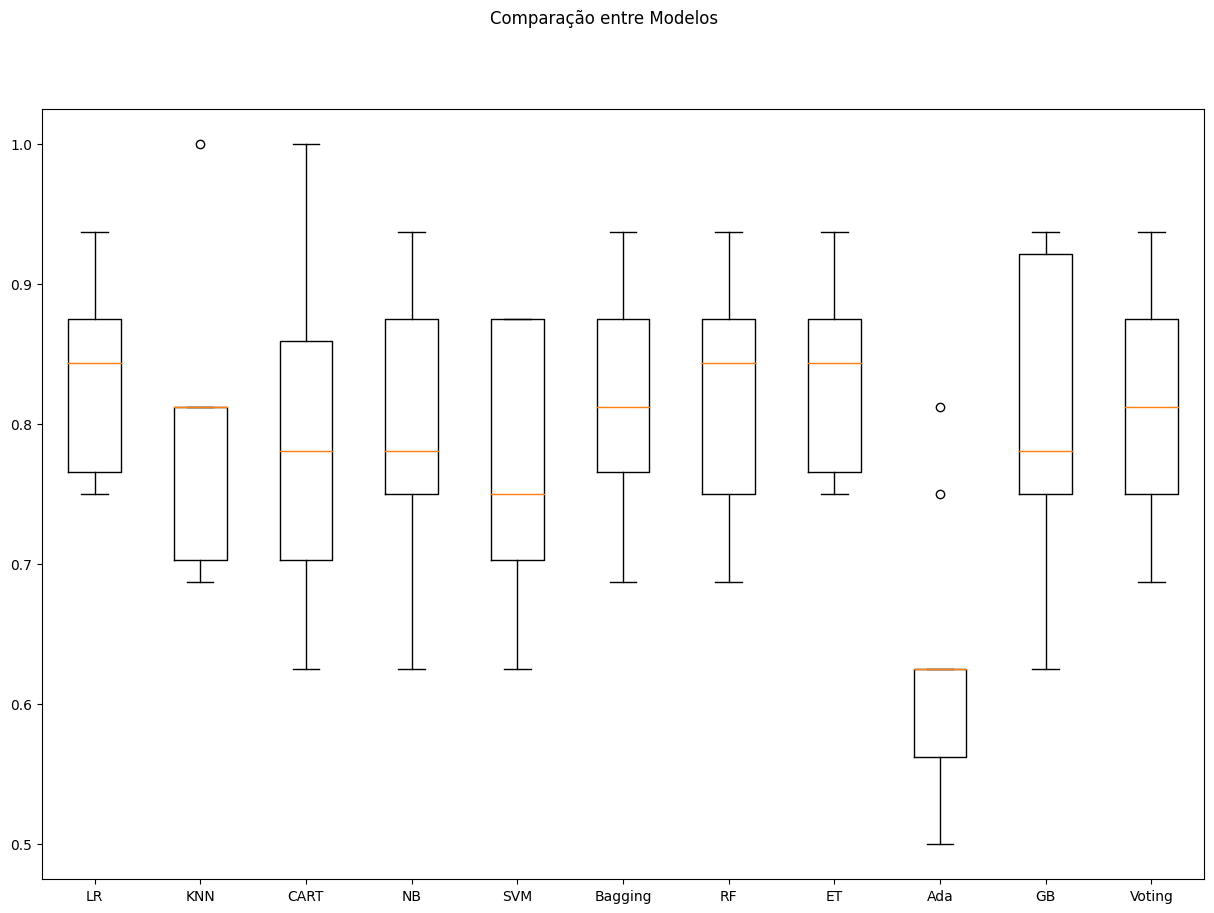

In [6]:
np.random.seed(7)  # Definindo uma semente global para replicabilidade

# Lista para armazenar os classificadores
models = []

# Instanciando os modelos e adicionando-os à lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Configurando parâmetros para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando modelos base para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Adicionando os modelos de ensemble à lista
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Preparação para armazenar os resultados das validações cruzadas
results = []
names = []

# Avaliação dos modelos utilizando cross-validation
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Gerando o gráfico boxplot para comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação entre Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###Criação e Avaliação de Modelos: Normalização e Padronização dos Dados

Para otimizar nossos modelos de previsão de vendas classificadas, baseados em investimentos em TV, rádio e jornal, aplicamos normalização e padronização aos dados. Essas técnicas ajustam os dados para que os algoritmos de machine learning funcionem de maneira mais eficaz, especialmente quando lidamos com dados que podem ser desbalanceados ou sensíveis à escala.

- StandardScaler:
Remove a média e ajusta a variância dos dados, garantindo que todos os recursos estejam na mesma escala, com média 0 e variância 1.

- MinMaxScaler:
Transforma os dados para um intervalo específico, geralmente entre 0 e 1, ajustando o menor valor para 0 e o maior valor para 1.

Essas técnicas são implementadas usando pipelines, que simplificam o processo de pré-processamento e modelagem.

LR-orig: 0.831 (0.063)
KNN-orig: 0.787 (0.089)
CART-orig: 0.787 (0.105)
NB-orig: 0.787 (0.102)
SVM-orig: 0.775 (0.089)
Bag-orig: 0.819 (0.071)
RF-orig: 0.819 (0.090)
ET-orig: 0.838 (0.070)
Ada-orig: 0.619 (0.095)
GB-orig: 0.812 (0.101)
Vot-orig: 0.806 (0.081)
LR-padr: 0.819 (0.076)
KNN-padr: 0.787 (0.094)
CART-padr: 0.794 (0.119)
NB-padr: 0.787 (0.102)
SVM-padr: 0.819 (0.090)
Bag-padr: 0.838 (0.075)
RF-padr: 0.812 (0.088)
ET-padr: 0.825 (0.073)
Ada-padr: 0.619 (0.095)
GB-padr: 0.812 (0.101)
Vot-padr: 0.812 (0.101)
LR-norm: 0.787 (0.109)
KNN-norm: 0.769 (0.108)
CART-norm: 0.806 (0.129)
NB-norm: 0.787 (0.102)
SVM-norm: 0.806 (0.117)
Bag-norm: 0.831 (0.084)
RF-norm: 0.819 (0.106)
ET-norm: 0.856 (0.074)
Ada-norm: 0.619 (0.095)
GB-norm: 0.819 (0.099)
Vot-norm: 0.812 (0.112)


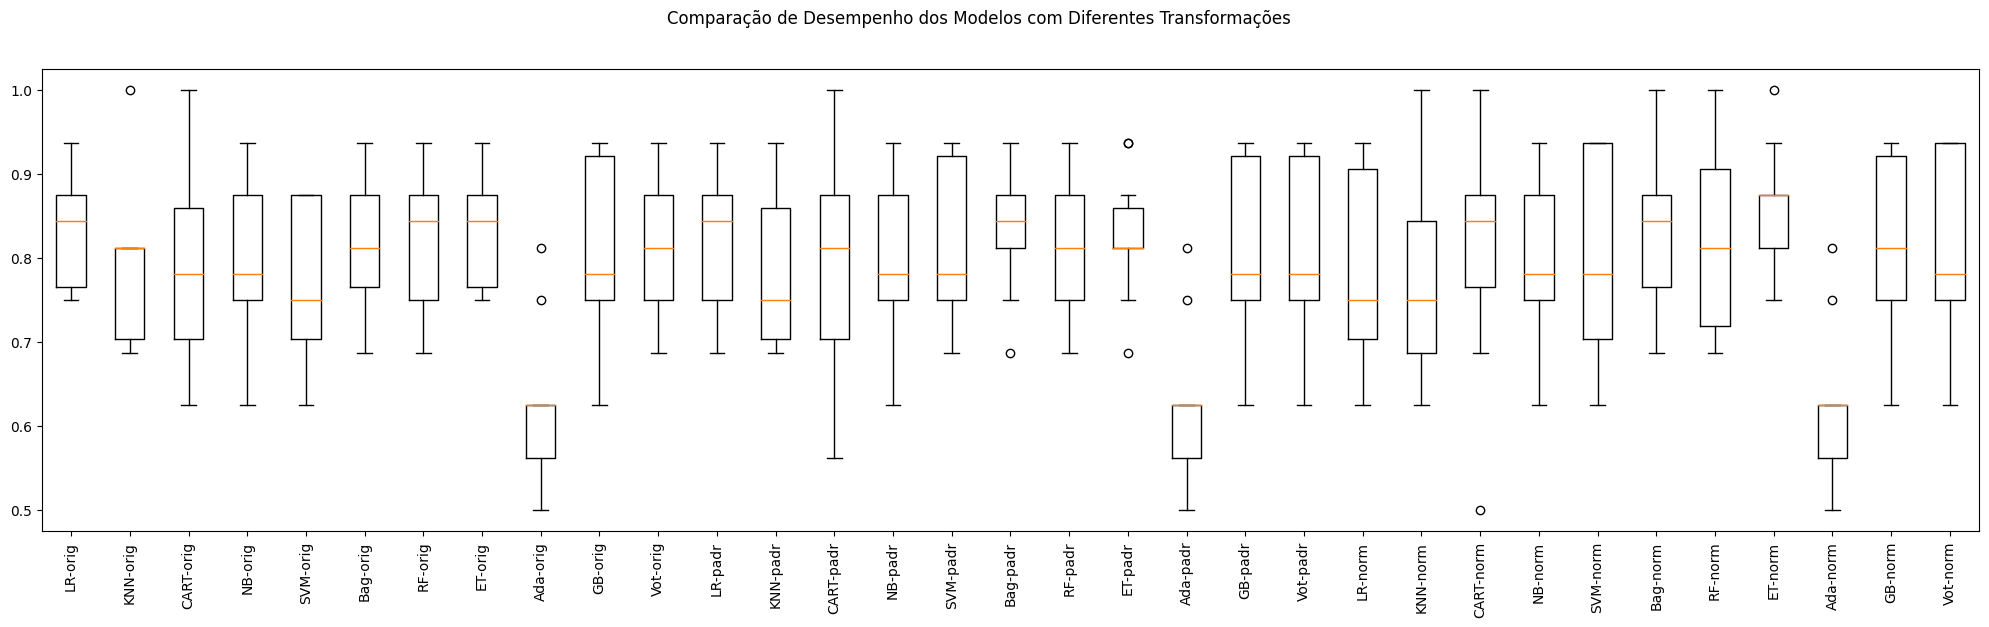

In [7]:
np.random.seed(7)  # Definindo a semente para este bloco de execução

# Listas para armazenar os pipelines e os resultados obtidos com as diferentes versões do dataset
pipelines = []
results = []
names = []

# Definindo os algoritmos que serão utilizados nos pipelines
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Definindo os métodos de transformação
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines com diferentes transformações aplicadas aos dados

# Dataset original sem escalonamento
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset com padronização (z-score)
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset normalizado (valores entre 0 e 1)
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines e coletando os resultados
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())  # Exibe média e desvio padrão
    print(msg)

# Gerando um boxplot para comparar os modelos aplicados nas diferentes transformações
fig = plt.figure(figsize=(25, 6))
fig.suptitle('Comparação de Desempenho dos Modelos com Diferentes Transformações')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização de Hiperparâmetros

A otimização de hiperparâmetros é sobre encontrar as melhores configurações para o modelo de machine learning, para que ele preveja vendas com maior precisão.

####Como Funciona o Grid Search?

1. Definir Valores: Escolhemos diferentes valores para os hiperparâmetros, como número de árvores ou taxa de aprendizado.

2. Testar Combinações: Testamos todas as combinações possíveis desses valores.

3. Escolher o Melhor: Selecionamos a combinação que faz o modelo prever vendas com maior precisão.



In [8]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

np.random.seed(7)

# Lista para armazenar os modelos a serem avaliados
models = [
    ('LR', LogisticRegression(max_iter=200)),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC())
]

# Preparação dos modelos para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Adicionando ensembles à lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=[
    ('logistic', LogisticRegression(max_iter=200)),
    ('cart', DecisionTreeClassifier()),
    ('svm', SVC())
], voting='hard')))

# Definindo grids de parâmetros
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
    }
}

# Realizando GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    param_grid = param_grids.get(model_type, {})

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=10)
    grid.fit(X_train, y_train)

    print("Modelo: %s - Melhor desempenho: %f utilizando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: LR-orig - Melhor desempenho: 0.781250 utilizando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor desempenho: 0.812500 utilizando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Modelo: CART-orig - Melhor desempenho: 0.793750 utilizando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
Modelo: NB-orig - Melhor desempenho: 0.775000 utilizando {'NB__var_smoothing': 1e-09}
Modelo: SVM-orig - Melhor desempenho: 0.843750 utilizando {'SVM__C': 0.1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
Modelo: Bag-orig - Melhor desempenho: 0.825000 utilizando {}
Modelo: RF-orig - Melhor desempenho: 0.850000 utilizando {'RF__max_depth': 30, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 5, 'RF__n_estimators': 10}
Modelo: ET-orig - Melhor desempenho: 0.837500 utilizando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 2, 'ET__n_estimators': 10}
Modelo: Ada

In [9]:
# Otimização dos hiperparâmetros do KNN

np.random.seed(7)  # Configurando uma semente global para garantir consistência nos resultados

pipelines = []

# Criando os componentes do pipeline para o KNN
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Adicionando diferentes variações do pipeline com o KNN
pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

# Definindo a grade de parâmetros para o KNN
param_grid = {
    'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Executando GridSearchCV para cada configuração de pipeline
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Exibindo a melhor configuração encontrada
    print("Configuração sem tratamento de missing values: %s - Melhor resultado: %f utilizando %s" % (name, grid.best_score_, grid.best_params_))

Configuração sem tratamento de missing values: knn-orig - Melhor resultado: 0.806250 utilizando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Configuração sem tratamento de missing values: knn-padr - Melhor resultado: 0.812500 utilizando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Configuração sem tratamento de missing values: knn-norm - Melhor resultado: 0.825000 utilizando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}


## Conclusão do Modelo

In [10]:
# Avaliação do modelo usando o conjunto de teste
# Modelo otimizado: RandomForestClassifier com normalização
# Melhor resultado encontrado: 0.783287 com {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

np.random.seed(7)

# Configurando o escalador e aplicando a normalização ao conjunto de treino
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)  # Normalização dos dados de treino

# Inicializando e ajustando o modelo RandomForest com os melhores parâmetros encontrados
model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)
model.fit(rescaledX, y_train)

# Aplicando a mesma normalização ao conjunto de teste e realizando previsões
rescaledTestX = scaler.transform(X_test)  # Normalização dos dados de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))  # Calculando e exibindo a acurácia no conjunto de teste

0.9


###Executando o Modelo com Hiperparâmetros Otimizados

In [11]:
np.random.seed(7)  # Configurando a semente global para garantir reprodutibilidade

# Configurando o modelo RandomForest com os melhores parâmetros encontrados
model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)

# Criando o pipeline com normalização MinMaxScaler e o modelo RandomForest
pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

# Ajustando o pipeline aos dados de treino
pipeline.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
predictions = pipeline.predict(X_test)

# Calculando e exibindo a acurácia das previsões no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9


## Exportando os Arquivos

In [12]:
# Criando diretórios necessários, se ainda não existirem
os.makedirs("../models", exist_ok=True)
os.makedirs("../scalers", exist_ok=True)
os.makedirs("../pipelines", exist_ok=True)
os.makedirs("../data", exist_ok=True)

# Salvando o modelo RandomForest em um arquivo
model_filename = 'rf_advertising_classifier.pkl'
with open("../models/" + model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler MinMaxScaler em um arquivo
scaler_filename = 'minmax_scaler_advertising.pkl'
with open("../scalers/" + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline completo em um arquivo
pipeline_filename = 'rf_advertising_pipeline.pkl'
with open("../pipelines/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando os conjuntos de dados X_test e y_test em arquivos CSV
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_advertising.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_advertising.csv", index=False)

## Testando o Modelo em Novos Dados

In [13]:
# Configuração do modelo usando o conjunto completo de dados
scaler = MinMaxScaler().fit(X)  # Ajustando o escalador com todo o dataset
rescaledX = scaler.transform(X)  # Aplicando a normalização a todo o dataset
model.fit(rescaledX, y)  # Treinando o modelo com os dados normalizados

RandomForestClassifier(max_depth=10, n_estimators=50)

In [14]:
# Dados de entrada para previsão - a classe não é conhecida
data = {
    'TV': [23.1, 100.5, 197.2],
    'Radio': [39.8, 79.3, 45.9],
    'Jornal': [69.2, 45.1, 69.3],
}

# Definindo as colunas dos atributos
atributos = ['TV', 'Radio', 'Jornal']
entrada = pd.DataFrame(data, columns=atributos)

# Convertendo o DataFrame em um array e selecionando as colunas para transformação
array_entrada = entrada.values
X_entrada = array_entrada[:, 0:3].astype(float)  # Corrigido para incluir apenas 3 colunas

# Aplicando a mesma padronização utilizada nos dados de treinamento
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)  # Exibindo os dados normalizados para as novas entradas

[[0.07575245 0.80241935 0.60598065]
 [0.33750423 1.59879032 0.39401935]
 [0.66452486 0.92540323 0.60686016]]


In [15]:
# Realizando previsões para os dados normalizados
saidas = model.predict(rescaledEntradaX)

# Mostrando as classes previstas para os dados de entrada
print(saidas)

[1. 2. 3.]


# Principais achados e Conclusão

####Resumo dos Achados e Análise dos Resultados
Neste trabalho, aplicamos técnicas avançadas de machine learning para prever os resultados de vendas com base nos investimentos em diferentes canais de publicidade, especificamente TV, rádio e jornal. O processo incluiu a padronização dos dados para garantir que todas as variáveis estivessem na mesma escala, o que é crucial para o desempenho adequado dos modelos de classificação. Adicionalmente, realizamos a discretização dos valores de vendas em três categorias (1 = BAIXA, 2 = MÉDIA e 3 = ALTA), facilitando a abordagem do problema como uma tarefa de classificação.

Os modelos foram avaliados utilizando um pipeline robusto que incluiu escalonamento dos dados e a aplicação de diferentes algoritmos de classificação. A técnica de cross-validation foi empregada para garantir uma avaliação rigorosa do desempenho dos modelos. Os resultados indicaram que o modelo RandomForestClassifier, treinado com dados normalizados, apresentou a melhor performance em termos de acurácia, demonstrando a eficácia do modelo para a tarefa proposta. Observou-se que a contribuição da publicidade em TV teve a maior influência nas previsões, destacando-se como o canal mais relevante entre os investimentos analisados.

####Pontos de Atenção
- Distribuição das Classes: Uma consideração importante é o potencial desbalanceamento nas classes de vendas (baixas = 1, médias = 2, e altas = 3). Tal desbalanceamento pode impactar negativamente a performance dos modelos. Técnicas como oversampling, undersampling ou o uso de algoritmos adaptativos podem ser aplicadas para melhorar o balanceamento das classes.

- Sazonalidade e Variáveis Temporais: O dataset utilizado não inclui variáveis temporais, como sazonalidade, que podem influenciar significativamente os resultados de vendas. Incorporar aspectos temporais em análises futuras pode refinar as previsões e oferecer uma visão mais completa dos fatores que afetam as vendas.

- Pipeline de Processamento de Dados: O pipeline criado para o modelo incluiu a normalização dos dados utilizando MinMaxScaler e a aplicação do RandomForestClassifier. Essa abordagem garante que o modelo seja aplicado de maneira consistente e que os dados sejam tratados de forma adequada, mas a inclusão de outros métodos de pré-processamento e validação cruzada adicional poderia oferecer insights mais profundos sobre a robustez do modelo.

####Conclusão
Em suma, o desenvolvimento e a avaliação dos modelos de classificação para prever vendas com base em investimentos em publicidade foram bem-sucedidos, demonstrando que a abordagem adotada é eficaz para identificar padrões relevantes no dataset. Os resultados proporcionaram insights valiosos sobre a relação entre investimentos publicitários e resultados de vendas. No entanto, há oportunidades para melhorias, como o balanceamento de classes e a inclusão de variáveis temporais, que devem ser exploradas em futuros estudos para otimizar ainda mais as previsões e análises.